# although the overall distribution across topics look very much the same, the specific aspects embedded in these themes do not coordinate

In [1]:
import os 
import pandas as pd
import numpy as np

from src.utils.dict_loader import TopicDictionary
from src.utils.output_loader import load_all_sum_vectors
from src.utils.downstream_aggregate import normalize

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

import yaml
with open("../../src/configs.yml", "r") as configs:
    configs = yaml.safe_load(configs)

ROOTPATH = configs["ROOTPATH"]

START2016 = pd.to_datetime(configs["START2016"])
END2016 = pd.to_datetime(configs["END2016"])
START2020 = pd.to_datetime(configs["START2020"])
END2020 = pd.to_datetime(configs["END2020"])

INPUT_FPATH = configs["SUM_TOPVEC_PATH"]
print(f"INPUT_FPATH=={INPUT_FPATH}")

INPUT_FPATH2 = configs["SUM_WORDVEC_PATH"]
print(f"INPUT_FPATH2=={INPUT_FPATH2}")

OUTPUT_FPATH = ROOTPATH + "output/figs/"
print(f"OUTPUT_FPATH=={OUTPUT_FPATH}")

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/yijingch/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /Users/yijingch/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


INPUT_FPATH==/Users/yijingch/Documents/GITHUB/intermedia-agenda-setting/output/sum-topvec-min2-gtm1/
INPUT_FPATH2==/Users/yijingch/Documents/GITHUB/intermedia-agenda-setting/output/sum-wordvec-min2-gtm1/
OUTPUT_FPATH==/Users/yijingch/Documents/GITHUB/intermedia-agenda-setting/output/figs/


In [2]:
from src.utils.dict_configuration import dictionary2016, dictionary2020

sum_wordvecs2016 = load_all_sum_vectors(year=2016, sumvec_fpath=INPUT_FPATH2, vector_type="wordvecs")
sum_wordvecs2020 = load_all_sum_vectors(year=2020, sumvec_fpath=INPUT_FPATH2, vector_type="wordvecs")

Successfully loaded dictionary!
	# of unique topics: 27
	# of unique words: 1426
Successfully loaded dictionary!
	# of unique topics: 27
	# of unique words: 1453


In [3]:
from scipy.stats import pearsonr, spearmanr, kendalltau

def normalize(arr, smooth=0):
    return (np.array(arr)+smooth)/np.sum(np.array(arr)+smooth)

def get_correlation(arr1, arr2, idx2drop=[], corr_func=pearsonr):
    if len(idx2drop) > 0:
        arr1_clean = np.delete(arr1, idx2drop)
        arr2_clean = np.delete(arr2, idx2drop)
    else:
        arr1_clean = arr1
        arr2_clean = arr2
    arr1_clean = normalize(arr1_clean)
    arr2_clean = normalize(arr2_clean)
    if len(arr1) > 1 and len(arr2) > 1:
        corr, p = corr_func(arr1_clean, arr2_clean)
        return corr, p
    else:
        return np.NaN, np.NaN

In [4]:
TOPICS2DROP = [
    "election_campaign", "general_controversies", "no_topic", 
    "forestry", "land_water_management", "agriculture", "housing", 
    "transportation", "culture"]

TOPICS2DROP_IDX2016 = [dictionary2016.topic2index[x] for x in TOPICS2DROP]
TOPICS2DROP_IDX2020 = [dictionary2020.topic2index[x] for x in TOPICS2DROP]

In [5]:
N_TOP_WORDS = 500
TOP_WORDS1_2016 = np.argsort(-sum_wordvecs2016["headline"][0][0])[:N_TOP_WORDS]
TOP_WORDS2_2016 = np.argsort(-sum_wordvecs2016["headline"][1][0])[:N_TOP_WORDS]

TOP_WORDS1_2020 = np.argsort(-sum_wordvecs2020["headline"][0][0])[:N_TOP_WORDS]
TOP_WORDS2_2020 = np.argsort(-sum_wordvecs2020["headline"][1][0])[:N_TOP_WORDS]

In [6]:
ABBR_MAP = {
    "healthcare":"HLTH", 
    "election_campaign":"ELEC", 
    "general_controversies":"GENC", 
    "trump_controversies":"TRUC", 
    "civil_rights":"CIVR", 
    "crime":"CRIM", 
    "clinton_controversies":"CLIC", 
    "biden_controversies":"BIDC",
    "intl_affairs":"INTL", 
    "government_ops":"GVOP", 
    "energy":"ENRG", 
    "economy":"ECON", 
    "sstc":"SSTC", 
    "foreign_trade":"FRTR", 
    "immigration":"IMMI", 
    "social_welfare":"SOWL", 
    "education":"EDUC", 
    "environment":"ENVR", 
    "labour":"LABR", 
    "defence":"DEFC", 
    "religion":"RELG", 
    "agriculture":"AGRI", 
    "housing":"HOUS", 
    "transportation":"TRSP", 
    "land_water_management":"LWMN", 
    "forestry":"FRST", 
    "culture":"CLTR", 
    "no_topic":"NA", 
    "DEM_cand_controversies":"DEMC",
    "REP_cand_controversies":"REPC"
}

MARKER_MAP = {
    "healthcare":".",
    "election_campaign":"^",
    "general_controversies":"*",
    "trump_controversies":"*",
    "civil_rights":".",
    "crime":".",
    "clinton_controversies":"*",
    "biden_controversies":"*",
    "intl_affairs":".",
    "government_ops":"^",
    "energy":".",
    "economy":".",
    "sstc":".",
    "foreign_trade":".",
    "immigration":".",
    "social_welfare":".",
    "education":".",
    "environment":".",
    "labour":".",
    "defence":".",
    "religion":".",
    "agriculture":".",
    "housing":".",
    "transportation":".",
    "land_water_management":".",
    "forestry":".",
    "culture":".",
    "no_topic":"", 
    "DEM_cand_controversies":"*",
    "REP_cand_controversies":"*"
}

In [7]:
topic = "biden_controversies"
sum_wordvecs = sum_wordvecs2020
dictionary = dictionary2020
topic_words = dictionary.df[dictionary.df["topic"]==topic]["word"].tolist()
topic_words += dictionary.df[dictionary.df["topic"]=="general_controversies"]["word"].tolist()
media1_idx = 1
media2_idx = 2
media1_wv = sum_wordvecs["headline"][0][media1_idx]
media2_wv = sum_wordvecs["headline"][0][media2_idx]

# for i in np.argsort(-media1_wv)[:200]:
#     word = dictionary.index2word[i]
#     if word in topic_words:
#         print("LOWC", i, word, media1_wv[i])

for i in np.argsort(-media2_wv)[:500]:
    word = dictionary.index2word[i]
    if word in topic_words:
        print("TRAD", i, word, media2_wv[i])

TRAD 270 hunter biden 1380.4111620541219
TRAD 821 conced 646.4820648245784
TRAD 904 alleg 602.1326616689864
TRAD 793 accus 527.3738679249664
TRAD 940 son 325.1659705851772
TRAD 823 corrupt 275.64757734888076
TRAD 811 lie 273.7436382242205
TRAD 351 rudi giuliani 251.08961217245778
TRAD 834 hack 242.0591672503628
TRAD 860 radic 209.637468043698
TRAD 773 antifa 199.16765397452028
TRAD 906 hunter 197.7075406935835
TRAD 784 laptop 187.60909855848314
TRAD 775 condemn 186.85615266266666
TRAD 731 giuliani 180.3769339744536
TRAD 343 fals claim 176.7624133658145
TRAD 785 document 176.5729590470464
TRAD 739 deni 175.7916763686708
TRAD 845 stoke 167.63035334640807
TRAD 718 probe 159.02380176108895
TRAD 846 ukrain 155.48202081980622
TRAD 560 mental 146.09837260205464
TRAD 734 scandal 145.25772122353888
TRAD 380 biden son 140.4789061388578
TRAD 334 biden famili 123.71114161313801
TRAD 39 new york post 109.09885938741499
TRAD 295 cognit test 106.42185415583492
TRAD 381 ny post 102.03420604570745
TRAD

In [8]:
topic = "trump_controversies"
sum_wordvecs = sum_wordvecs2020
dictionary = dictionary2020
topic_words = dictionary.df[dictionary.df["topic"]==topic]["word"].tolist()
topic_words += dictionary.df[dictionary.df["topic"]=="general_controversies"]["word"].tolist()
media1_idx = 3
media2_idx = 5
media1_wv = sum_wordvecs["headline"][1][media1_idx]
media2_wv = sum_wordvecs["headline"][1][media2_idx]

for i in np.argsort(-media1_wv)[:100]:
    word = dictionary.index2word[i]
    if word in topic_words:
        # print("LOWC", i, word, media1_wv[i])
        print("LEFT", i, word, media1_wv[i])
for i in np.argsort(-media2_wv)[:100]:
    word = dictionary.index2word[i]
    if word in topic_words:
        # print("TRAD", i, word, media2_wv[i])
        print("RIGHT", i, word, media2_wv[i])

LEFT 811 lie 1846.2226822830323
LEFT 741 ivanka 1300.213903174542
LEFT 308 melania trump 1092.11532894722
LEFT 793 accus 1079.912706775125
LEFT 945 book 1079.7154509481522
LEFT 821 conced 903.1383718829494
LEFT 939 racist 887.6928092869753
LEFT 758 democraci 819.2080055820179
LEFT 865 mari 804.4217550555188
RIGHT 201 deep state 7321.489625653458
RIGHT 783 schiff 3079.326897614444
RIGHT 893 stone 2961.6250229016478
RIGHT 811 lie 2915.7721931561846
RIGHT 249 trump impeach 2899.8966499097514
RIGHT 835 epstein 2870.712172724656
RIGHT 793 accus 2596.744475803903
RIGHT 828 spi 2435.0667918141294
RIGHT 872 releas 2386.2746111454617


In [9]:
def generate_by_topic_keywords_corr(year, media1_idx, media2_idx, cand_idx, topwords, postfix):
    if year == 2016:
        dictionary = dictionary2016
        sum_wordvecs = sum_wordvecs2016
        candidates = ["trump", "clinton"]
        parties = ["REP", "DEM"]
    elif year == 2020:
        dictionary = dictionary2020
        sum_wordvecs = sum_wordvecs2020
        candidates = ["biden", "trump"]
        parties = ["DEM", "REP"]
    media1_wv = sum_wordvecs["headline"][cand_idx][media1_idx]
    media2_wv = sum_wordvecs["headline"][cand_idx][media2_idx]

    corr_df = pd.DataFrame()
    corr_df["topic"] = dictionary.topics
    num_keywords = []
    counts_keywords1 = []
    counts_keywords2 = []
    corrs = []
    for t in dictionary.topics:
        topic_keywords = dictionary.df[dictionary.df["topic"]==t]["word"].tolist()
        if t == f"{candidates[cand_idx]}_controversies": 
            # for the controversial topic related to this texts
            # add the counts from general controversies
            topic_keywords += dictionary.df[dictionary.df["topic"]=="general_controversies"]["word"].tolist()
        if t == "government_ops":
            topic_keywords += dictionary.df[dictionary.df["topic"]=="election_campaign"]["word"].tolist()
        topic_keywords_idx = [dictionary.word2index[w] for w in topic_keywords]
        topic_keywords_idx = list(set(topic_keywords_idx).intersection(set(topwords)))
        num_keywords.append(len(topic_keywords_idx))
        if len(topic_keywords_idx) > 0:        
            media1_wv_short = media1_wv[np.array(topic_keywords_idx)]
            media2_wv_short = media2_wv[np.array(topic_keywords_idx)]
            counts_keywords1.append(np.sum(media1_wv_short))
            counts_keywords2.append(np.sum(media2_wv_short))
            corr, _ = get_correlation(media1_wv_short, media2_wv_short)
            corrs.append(corr)
        else:
            counts_keywords1.append(np.NaN)
            counts_keywords2.append(np.NaN)
            corrs.append(np.NaN)
    corr_df[f"corr_{candidates[cand_idx]}{postfix}{year}"] = corrs
    corr_df[f"n_words_{candidates[cand_idx]}{postfix}{year}"] = num_keywords
    corr_df[f"c1_words_{candidates[cand_idx]}{postfix}{year}"] = counts_keywords1
    corr_df[f"c2_words_{candidates[cand_idx]}{postfix}{year}"] = counts_keywords2
    corr_df = corr_df[~corr_df["topic"].isin(TOPICS2DROP)]
    corr_df["marker"] = corr_df["topic"].map(lambda x: MARKER_MAP[x])
    for cand,part in zip(candidates, parties):
        corr_df["topic"].replace(f"{cand}_controversies", f"{part}_cand_controversies", inplace=True)
    return corr_df

cred_corr2016_cand1 = generate_by_topic_keywords_corr(2016, media1_idx=1, media2_idx=2, cand_idx=0, topwords=TOP_WORDS1_2016, postfix="_cred")
cred_corr2016_cand2 = generate_by_topic_keywords_corr(2016, media1_idx=1, media2_idx=2, cand_idx=1, topwords=TOP_WORDS2_2016, postfix="_cred").drop(columns="marker")
cred_corr2016 = cred_corr2016_cand1.merge(cred_corr2016_cand2, on="topic")
cred_corr2016.sort_values(by=f"c1_words_trump_cred2016", inplace=True)

ideo_corr2016_cand1 = generate_by_topic_keywords_corr(2016, media1_idx=3, media2_idx=5, cand_idx=0, topwords=TOP_WORDS1_2016, postfix="_ideo")
ideo_corr2016_cand2 = generate_by_topic_keywords_corr(2016, media1_idx=3, media2_idx=5, cand_idx=1, topwords=TOP_WORDS2_2016, postfix="_ideo").drop(columns="marker")
ideo_corr2016 = ideo_corr2016_cand1.merge(ideo_corr2016_cand2, on="topic")
ideo_corr2016.sort_values(by=f"c1_words_trump_ideo2016", inplace=True)

cred_corr2020_cand1 = generate_by_topic_keywords_corr(2020, media1_idx=1, media2_idx=2, cand_idx=0, topwords=TOP_WORDS1_2020, postfix="_cred")
cred_corr2020_cand2 = generate_by_topic_keywords_corr(2020, media1_idx=1, media2_idx=2, cand_idx=1, topwords=TOP_WORDS2_2020, postfix="_cred").drop(columns="marker")
cred_corr2020 = cred_corr2020_cand1.merge(cred_corr2020_cand2, on="topic")
cred_corr2020.sort_values(by=f"c1_words_trump_cred2020", inplace=True)

ideo_corr2020_cand1 = generate_by_topic_keywords_corr(2020, media1_idx=3, media2_idx=5, cand_idx=0, topwords=TOP_WORDS1_2020, postfix="_ideo")
ideo_corr2020_cand2 = generate_by_topic_keywords_corr(2020, media1_idx=3, media2_idx=5, cand_idx=1, topwords=TOP_WORDS2_2020, postfix="_ideo").drop(columns="marker")
ideo_corr2020 = ideo_corr2020_cand1.merge(ideo_corr2020_cand2, on="topic")
ideo_corr2020.sort_values(by=f"c1_words_trump_ideo2020", inplace=True)

In [10]:
COLORMAP = {
    "low-cred": "#F94C10",
    "traditional": "#183D3D",
    "left": "#4A55A2",
    "right": "#B31312", 
    "DEM": "#4A55A2",
    "REP": "#B31312", 
    "option1": "#3F1D38"
}

## Distribution of keywords within these topics

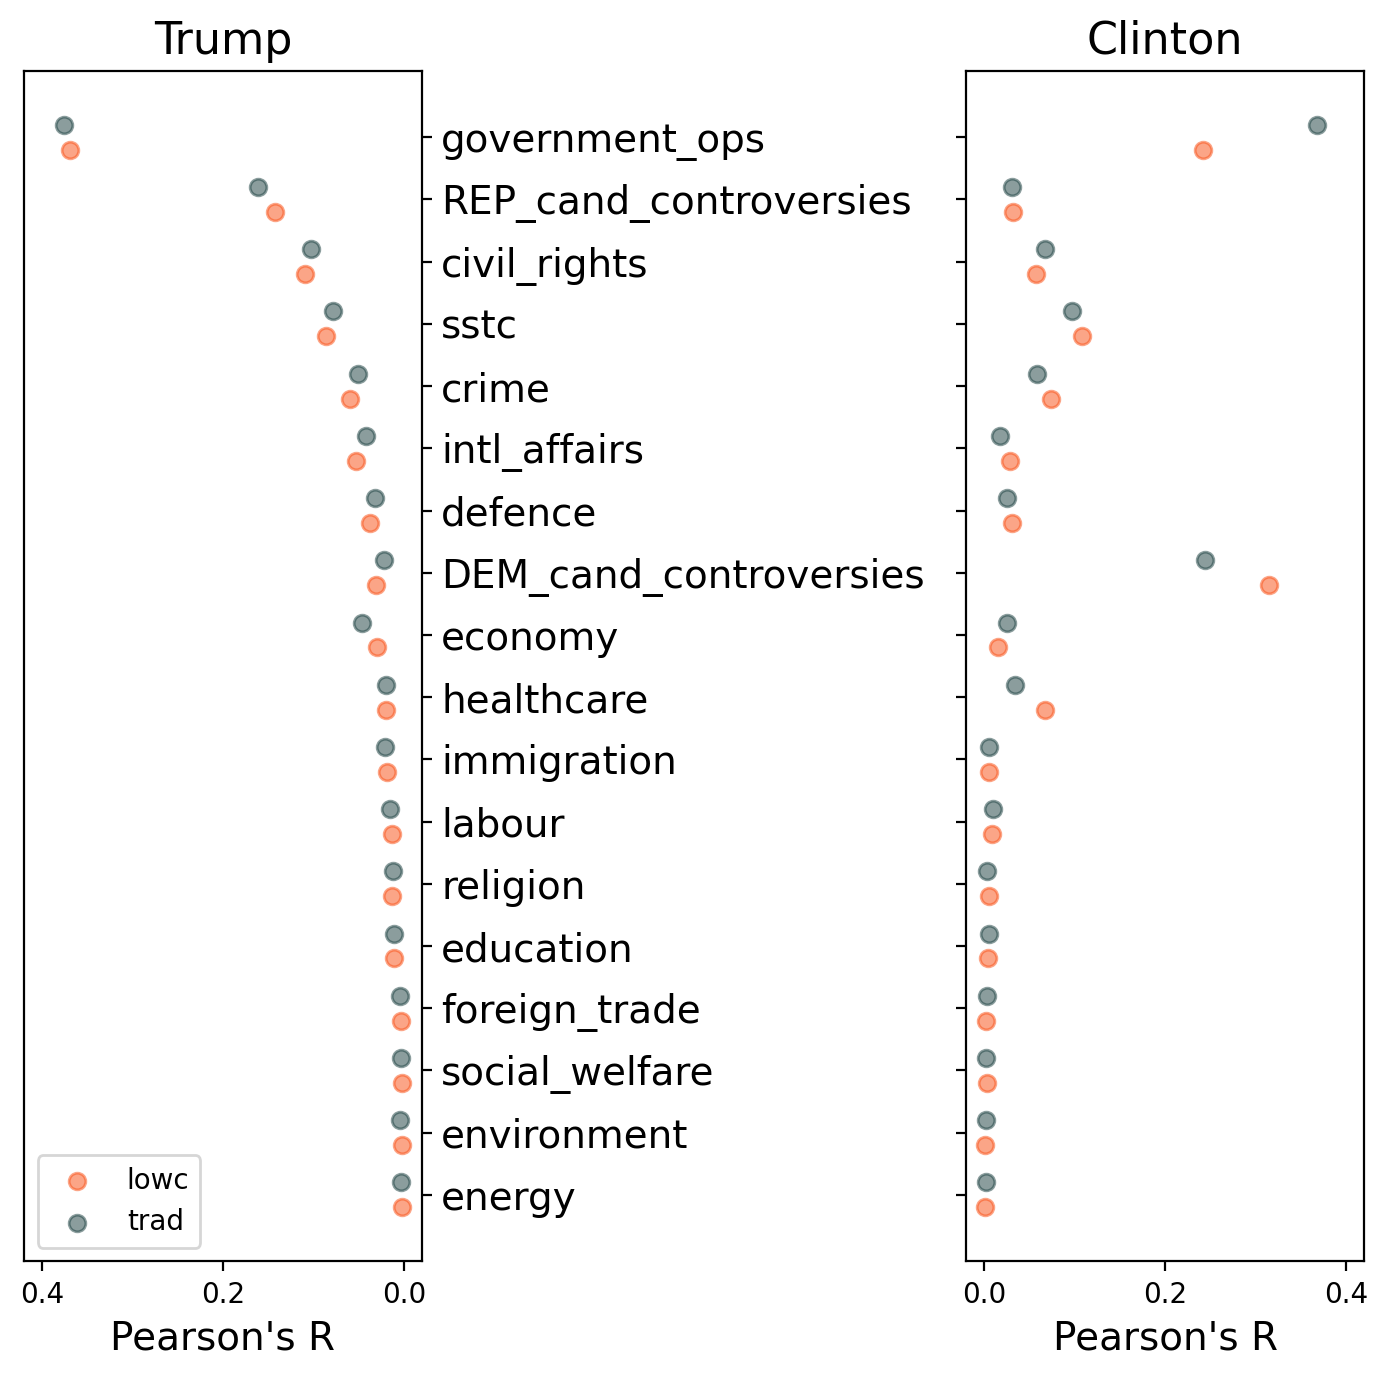

In [11]:
figs,ax = plt.subplots(ncols=2, figsize=(7,7), sharey=True)
diff = .2

ax[0].scatter(normalize(cred_corr2016["c1_words_trump_cred2016"]), np.arange(len(cred_corr2016))-diff, color=COLORMAP["low-cred"], alpha=.5, label="lowc")
ax[0].scatter(normalize(cred_corr2016["c2_words_trump_cred2016"]), np.arange(len(cred_corr2016))+diff, color=COLORMAP["traditional"], alpha=.5, label="trad")

ax[1].scatter(normalize(cred_corr2016["c1_words_clinton_cred2016"]), np.arange(len(cred_corr2016))-diff, color=COLORMAP["low-cred"], alpha=.5, label="lowc")
ax[1].scatter(normalize(cred_corr2016["c2_words_clinton_cred2016"]), np.arange(len(cred_corr2016))+diff, color=COLORMAP["traditional"], alpha=.5, label="trad")

ax[0].yaxis.tick_right()
for i in [0,1]:
    ax[i].set_xlim(-.02,0.42)
    ax[i].set_xlabel("Pearson's R", fontsize=14)
ax[0].set_title("Trump", fontsize=16) 
ax[1].set_title("Clinton", fontsize=16)
ax[0].set_yticks(range(len(cred_corr2016)), cred_corr2016["topic"], fontsize=14)
ax[0].legend(loc=3)
ax[0].invert_xaxis()
plt.tight_layout()
# plt.savefig(OUTPUT_FPATH + "keyword-alignment-cred-by-topic2016.pdf", dpi=300)

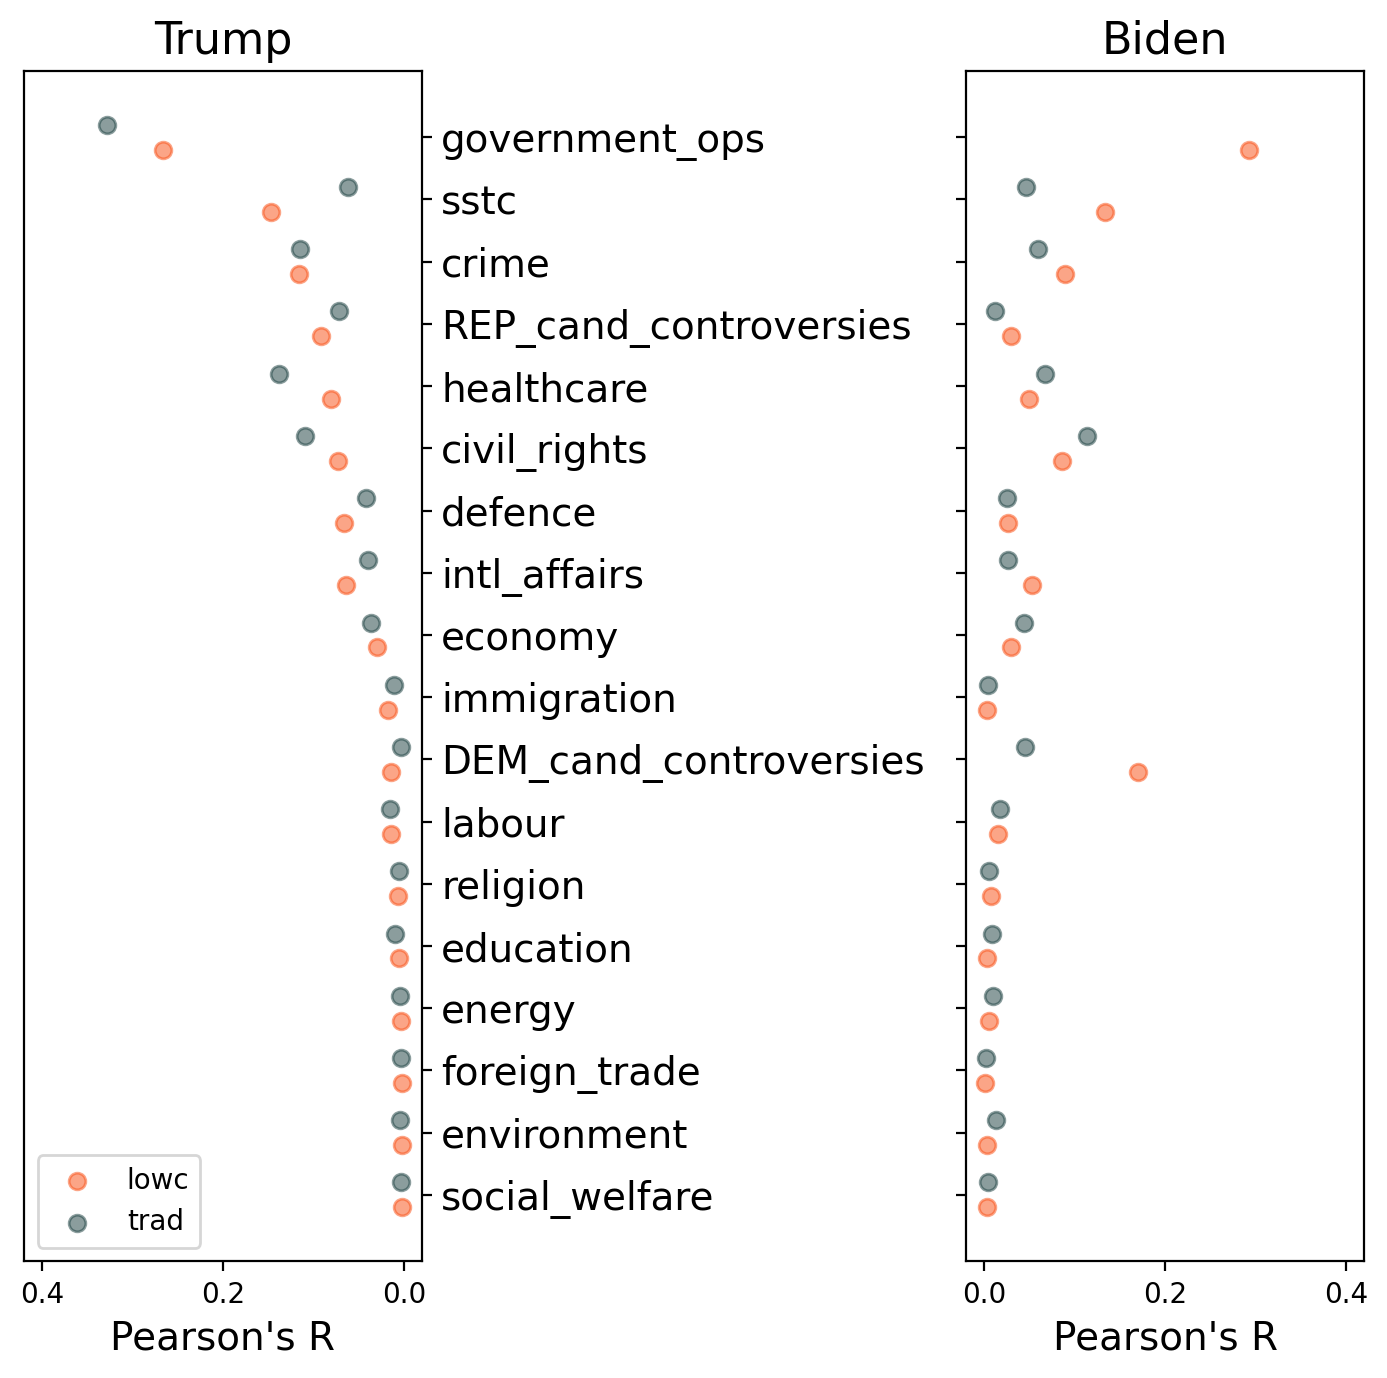

In [12]:
figs,ax = plt.subplots(ncols=2, figsize=(7,7), sharey=True)
diff = .2

ax[1].scatter(normalize(cred_corr2020["c1_words_biden_cred2020"]), np.arange(len(cred_corr2020))-diff, color=COLORMAP["low-cred"], alpha=.5, label="lowc")
ax[1].scatter(normalize(cred_corr2020["c2_words_biden_cred2020"]), np.arange(len(cred_corr2020))+diff, color=COLORMAP["traditional"], alpha=.5, label="trad")

ax[0].scatter(normalize(cred_corr2020["c1_words_trump_cred2020"]), np.arange(len(cred_corr2020))-diff, color=COLORMAP["low-cred"], alpha=.5, label="lowc")
ax[0].scatter(normalize(cred_corr2020["c2_words_trump_cred2020"]), np.arange(len(cred_corr2020))+diff, color=COLORMAP["traditional"], alpha=.5, label="trad")

ax[0].yaxis.tick_right()
for i in [0,1]:
    ax[i].set_xlim(-.02,0.42)
    ax[i].set_xlabel("Pearson's R", fontsize=14)
ax[0].set_title("Trump", fontsize=16) 
ax[1].set_title("Biden", fontsize=16)
ax[0].set_yticks(range(len(cred_corr2020)), cred_corr2020["topic"], fontsize=14)
ax[0].legend(loc=3)
ax[0].invert_xaxis()
plt.tight_layout()
# plt.savefig(OUTPUT_FPATH + "keyword-alignment-cred-by-topic2020.pdf", dpi=300)

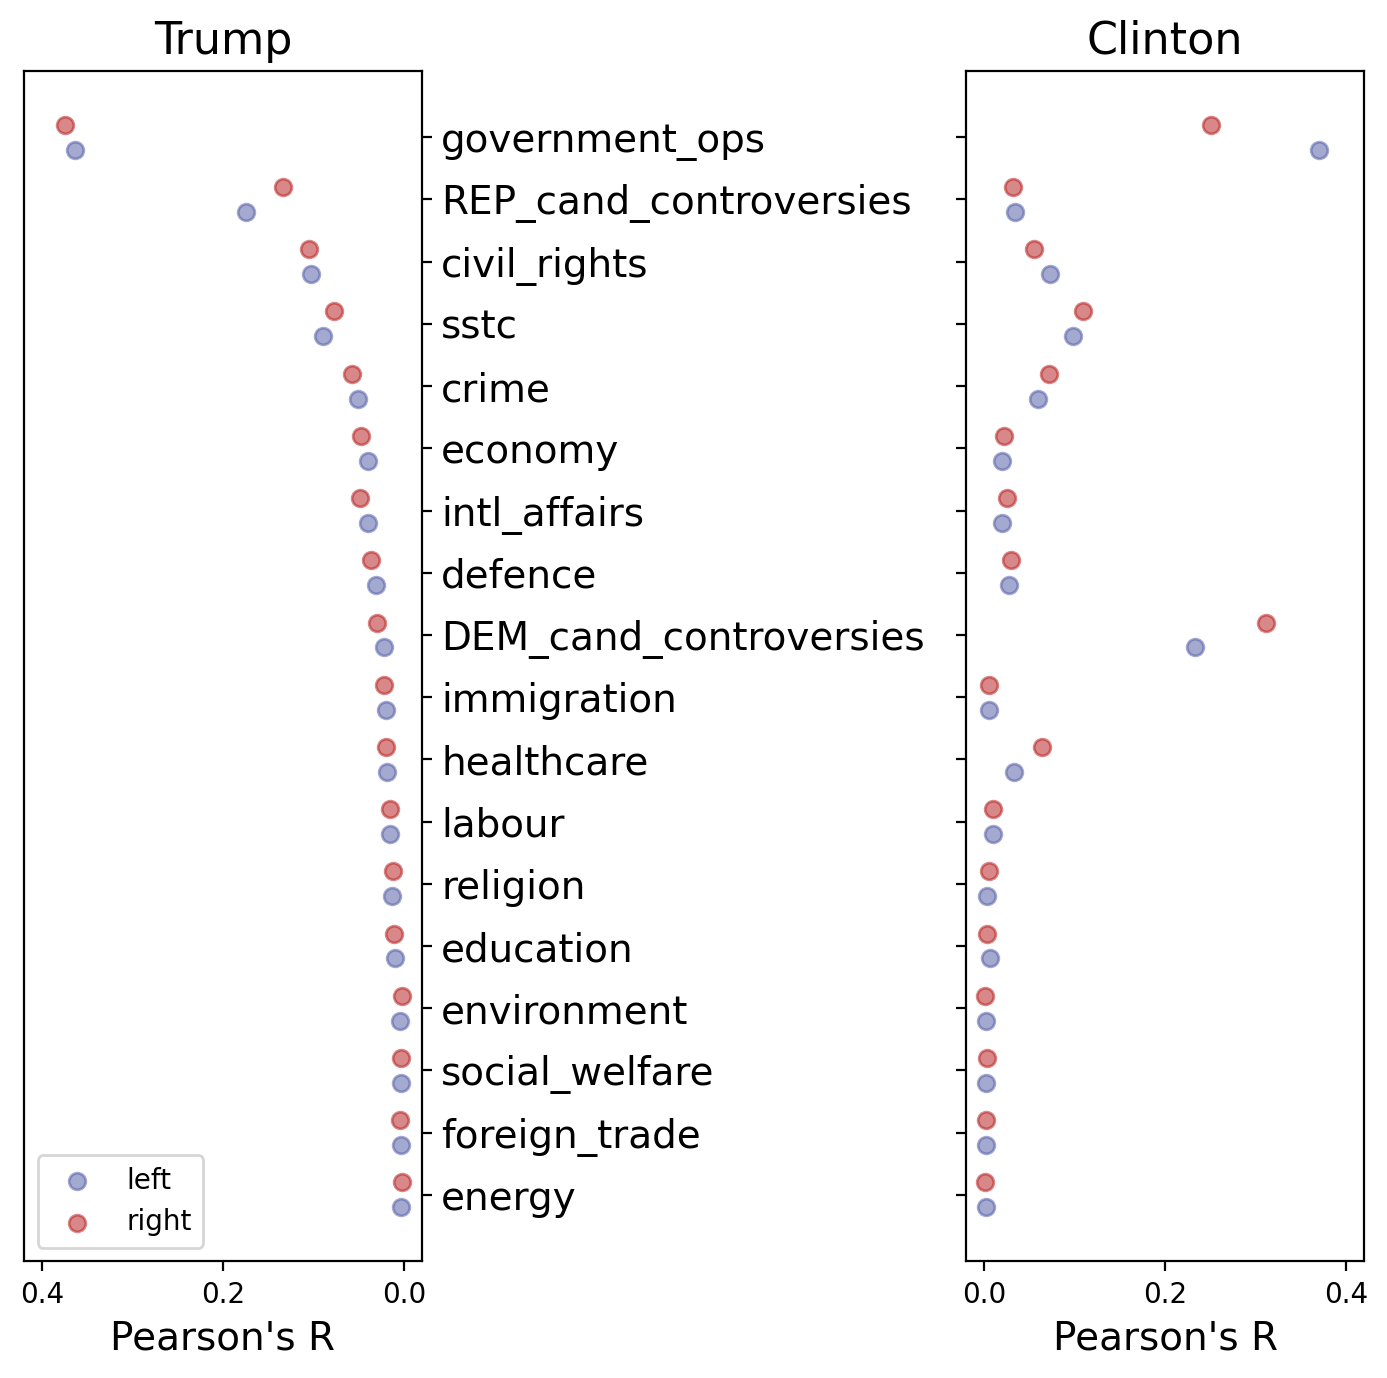

In [13]:
figs,ax = plt.subplots(ncols=2, figsize=(7,7), sharey=True)
diff = .2

ax[0].scatter(normalize(ideo_corr2016["c1_words_trump_ideo2016"]), np.arange(len(ideo_corr2016))-diff, color=COLORMAP["left"], alpha=.5, label="left")
ax[0].scatter(normalize(ideo_corr2016["c2_words_trump_ideo2016"]), np.arange(len(ideo_corr2016))+diff, color=COLORMAP["right"], alpha=.5, label="right")

ax[1].scatter(normalize(ideo_corr2016["c1_words_clinton_ideo2016"]), np.arange(len(ideo_corr2016))-diff, color=COLORMAP["left"], alpha=.5, label="left")
ax[1].scatter(normalize(ideo_corr2016["c2_words_clinton_ideo2016"]), np.arange(len(ideo_corr2016))+diff, color=COLORMAP["right"], alpha=.5, label="right")

ax[0].yaxis.tick_right()
for i in [0,1]:
    ax[i].set_xlim(-.02,0.42)
    ax[i].set_xlabel("Pearson's R", fontsize=14)
ax[0].set_title("Trump", fontsize=16) 
ax[1].set_title("Clinton", fontsize=16)
ax[0].set_yticks(range(len(ideo_corr2016)), ideo_corr2016["topic"], fontsize=14)
ax[0].legend(loc=3)
ax[0].invert_xaxis()
plt.tight_layout()
# plt.savefig(OUTPUT_FPATH + "keyword-alignment-ideo-by-topic2016.pdf", dpi=300)

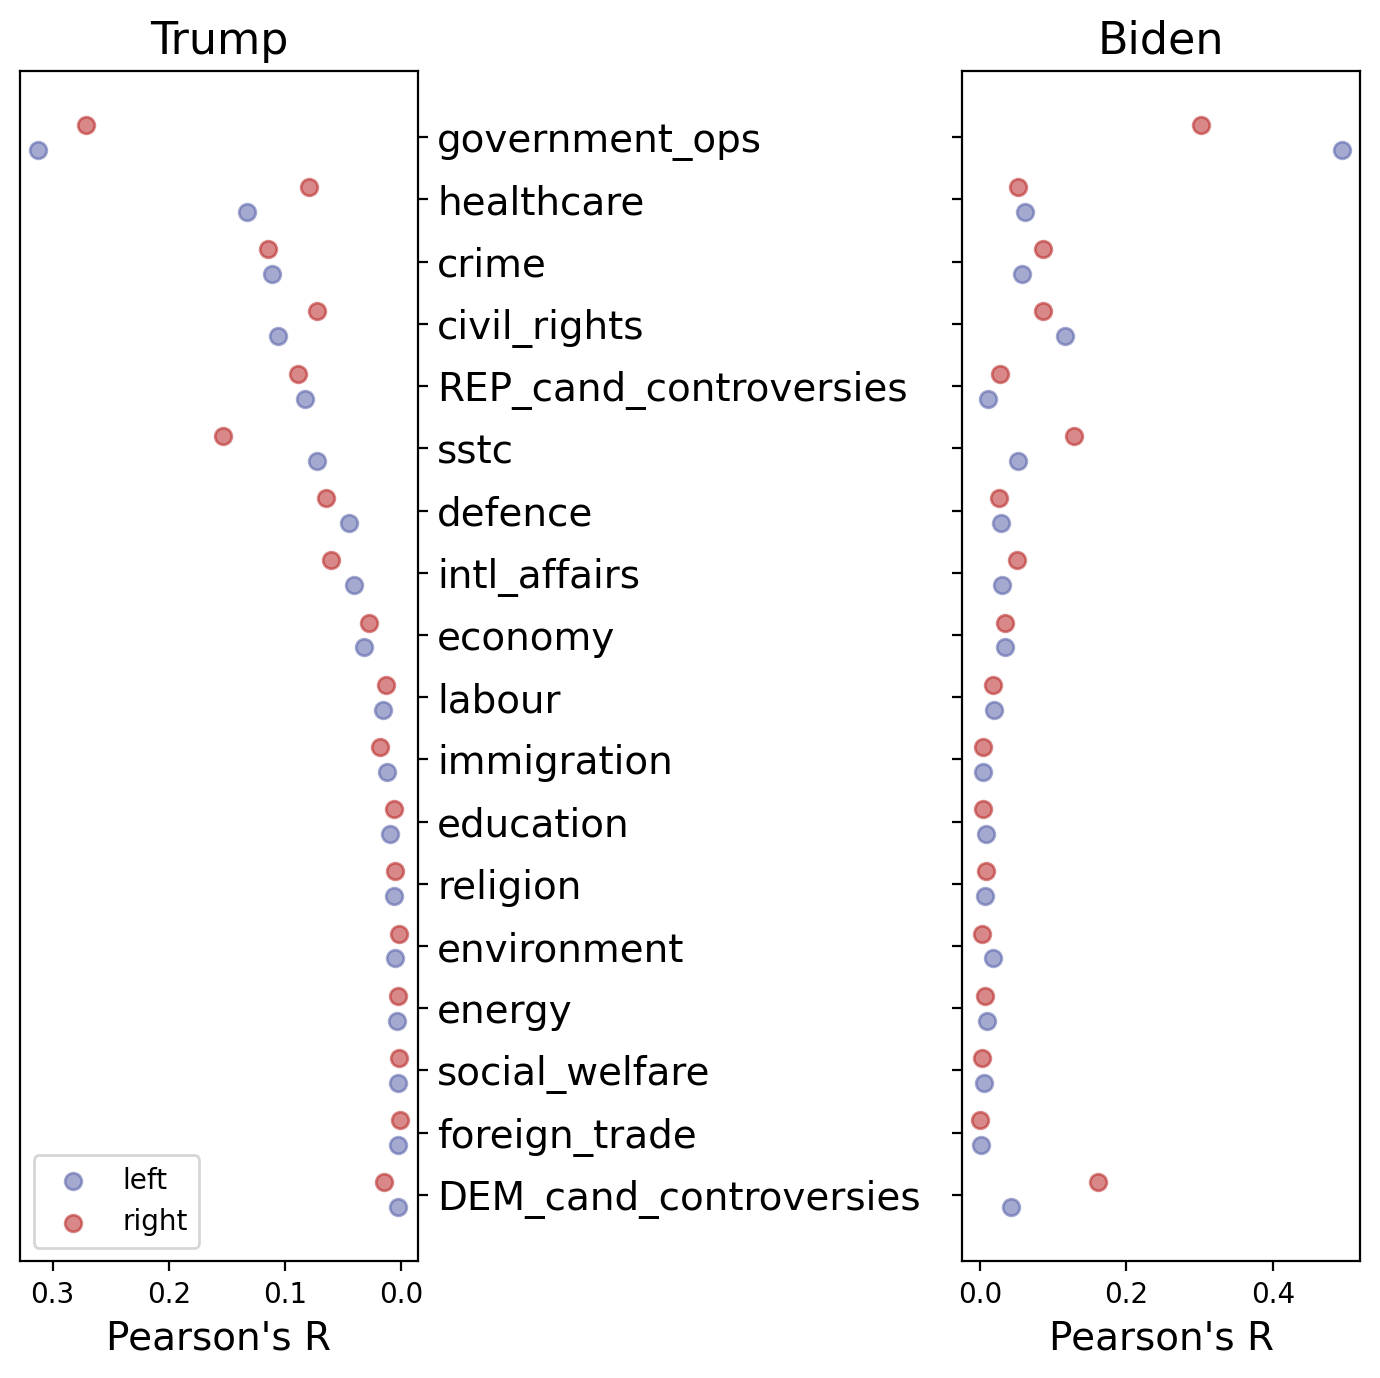

In [14]:
figs,ax = plt.subplots(ncols=2, figsize=(7,7), sharey=True)
diff = .2

ax[1].scatter(normalize(ideo_corr2020["c1_words_biden_ideo2020"]), np.arange(len(ideo_corr2020))-diff, color=COLORMAP["left"], alpha=.5, label="left")
ax[1].scatter(normalize(ideo_corr2020["c2_words_biden_ideo2020"]), np.arange(len(ideo_corr2020))+diff, color=COLORMAP["right"], alpha=.5, label="right")

ax[0].scatter(normalize(ideo_corr2020["c1_words_trump_ideo2020"]), np.arange(len(ideo_corr2020))-diff, color=COLORMAP["left"], alpha=.5, label="left")
ax[0].scatter(normalize(ideo_corr2020["c2_words_trump_ideo2020"]), np.arange(len(ideo_corr2020))+diff, color=COLORMAP["right"], alpha=.5, label="right")

ax[0].yaxis.tick_right()
for i in [0,1]:
    ax[i].set_xlabel("Pearson's R", fontsize=14)
ax[0].set_title("Trump", fontsize=16) 
ax[1].set_title("Biden", fontsize=16)
ax[0].set_yticks(range(len(ideo_corr2020)), ideo_corr2020["topic"], fontsize=14)
ax[0].legend(loc=3)
ax[0].invert_xaxis()
plt.tight_layout()
# plt.savefig(OUTPUT_FPATH + "keyword-alignment-ideo-by-topic2020.pdf", dpi=300)

## Correlations of keywords within these topics

In [15]:
cred_corr_bothyear = cred_corr2016.merge(cred_corr2020, on="topic")
ideo_corr_bothyear = ideo_corr2016.merge(ideo_corr2020, on="topic")

# thres = .05
# cred_corr_bothyear = cred_corr_bothyear[(cred_corr_bothyear["corr_trump_cred2016"]>=thres)&(cred_corr_bothyear["corr_trump_cred2020"]>=thres)].copy()
# cred_corr_bothyear = cred_corr_bothyear[(cred_corr_bothyear["corr_clinton_cred2016"]>=thres)&(cred_corr_bothyear["corr_biden_cred2020"]>=thres)].copy()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


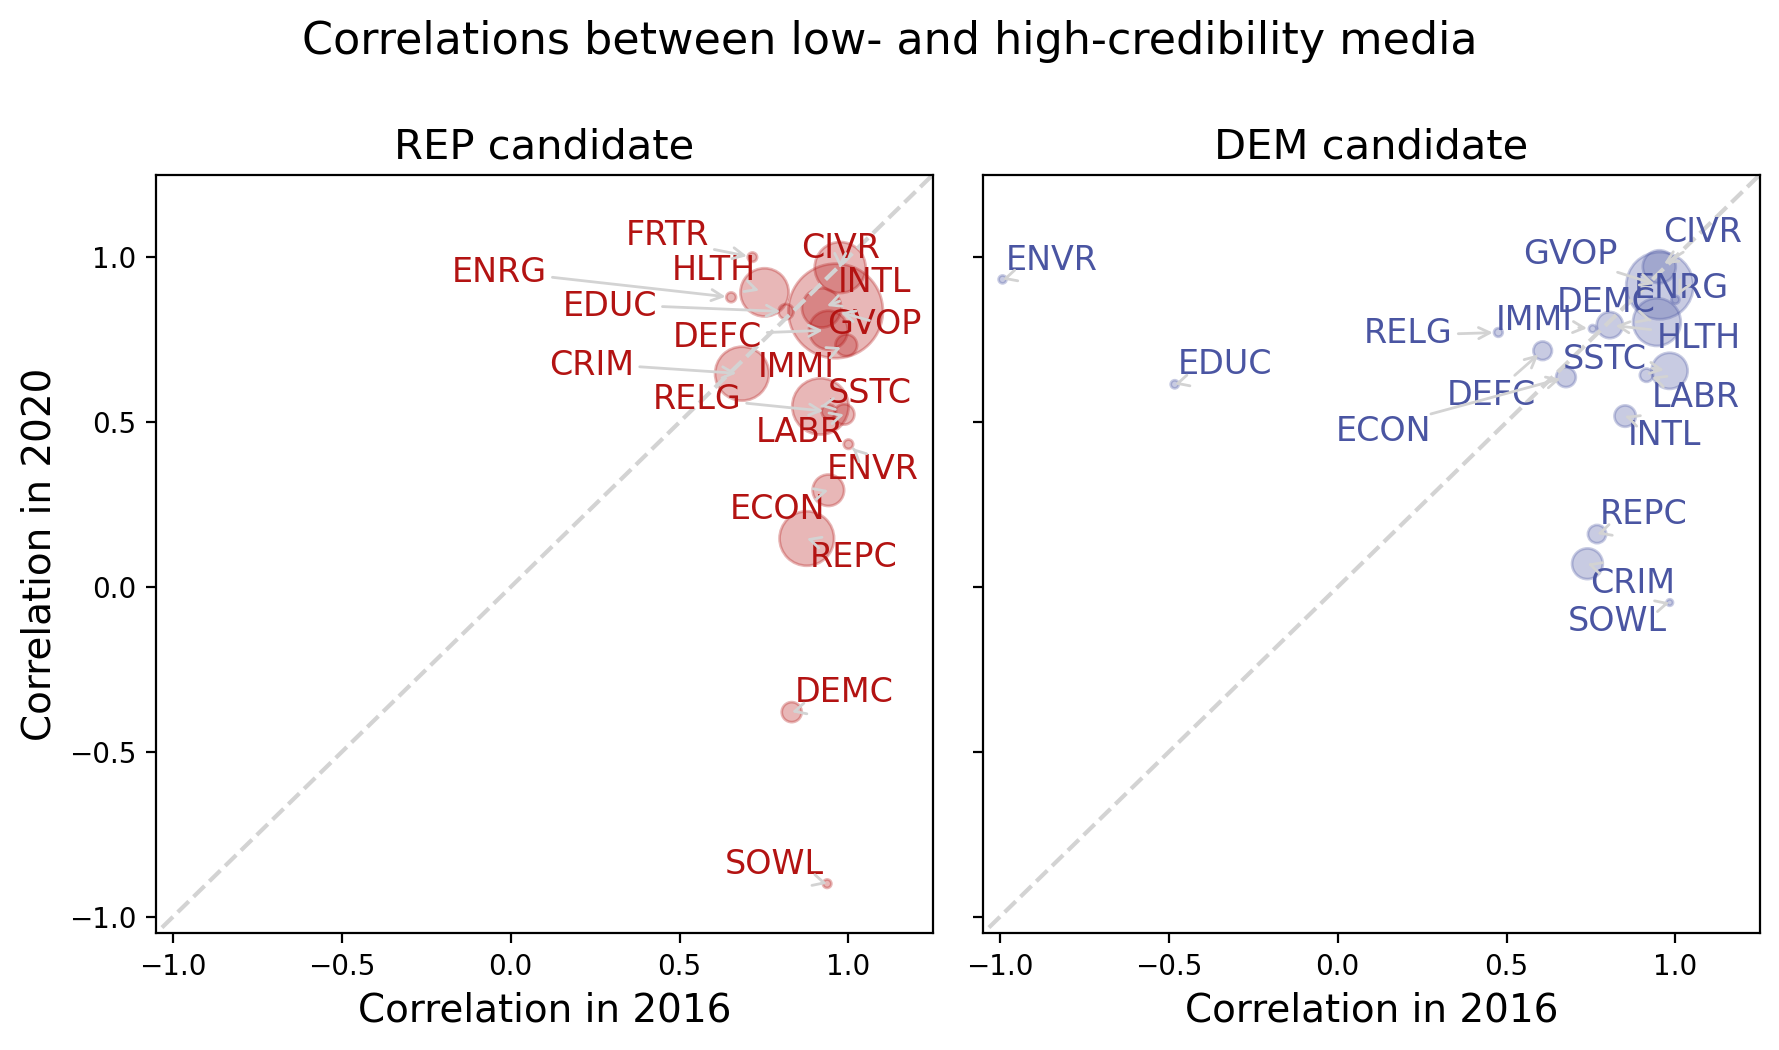

In [17]:
from adjustText import adjust_text

fig,ax = plt.subplots(ncols=2, figsize=(9,5.2), sharex=True, sharey=True)
topics = [ABBR_MAP[t] for t in cred_corr_bothyear["topic"].tolist()]

x1 = cred_corr_bothyear["corr_trump_cred2016"].tolist()
y1 = cred_corr_bothyear["corr_trump_cred2020"].tolist()
s1 = cred_corr_bothyear["c1_words_trump_cred2016"] + cred_corr_bothyear["c2_words_trump_cred2016"]
s1 += cred_corr_bothyear["c1_words_trump_cred2020"] + cred_corr_bothyear["c2_words_trump_cred2020"]

x2 = cred_corr_bothyear["corr_clinton_cred2016"].tolist()
y2 = cred_corr_bothyear["corr_biden_cred2020"].tolist()
s2 = cred_corr_bothyear["c1_words_clinton_cred2016"] + cred_corr_bothyear["c2_words_clinton_cred2016"]
s2 += cred_corr_bothyear["c1_words_biden_cred2020"] + cred_corr_bothyear["c2_words_biden_cred2020"]
# ax[0].scatter(x1, y1, color=COLORMAP["right"], alpha=.3, marker=".")
# ax[1].scatter(x2, y2, color=COLORMAP["left"], alpha=.3, marker=".")

ax[0].scatter(x1, y1, color=COLORMAP["right"], s=s1/500, alpha=.3)
ax[1].scatter(x2, y2, color=COLORMAP["left"], s=s2/500, alpha=.3)

ax[0].set_title("REP candidate", fontsize=15)
ax[1].set_title("DEM candidate", fontsize=15)

for i in range(2):
    ax[i].plot([-4,4],[-4,4], linestyle="--", color="lightgrey")
    ax[i].set_xlim(-1.05,1.25)
    ax[i].set_ylim(-1.05,1.25)
    ax[i].set_xlabel("Correlation in 2016", fontsize=14)
    if i == 0:
        ax[i].set_ylabel("Correlation in 2020", fontsize=14)
texts1 = [ax[0].text(x1[n], y1[n], topics[n], color=COLORMAP["right"], fontsize=12) for n in range(len(x1))]
texts2 = [ax[1].text(x2[n], y2[n], topics[n], color=COLORMAP["left"], fontsize=12) for n in range(len(x2))]

adjust_text(texts1, ax=ax[0], arrowprops=dict(arrowstyle="->", color="lightgrey"))
adjust_text(texts2, ax=ax[1], arrowprops=dict(arrowstyle="->", color="lightgrey"))
plt.suptitle("Correlations between low- and high-credibility media", fontsize=16, y=1)
plt.tight_layout()
plt.savefig(OUTPUT_FPATH + "cred_word_corr_across_year.pdf", dpi=300, bbox_inches="tight")

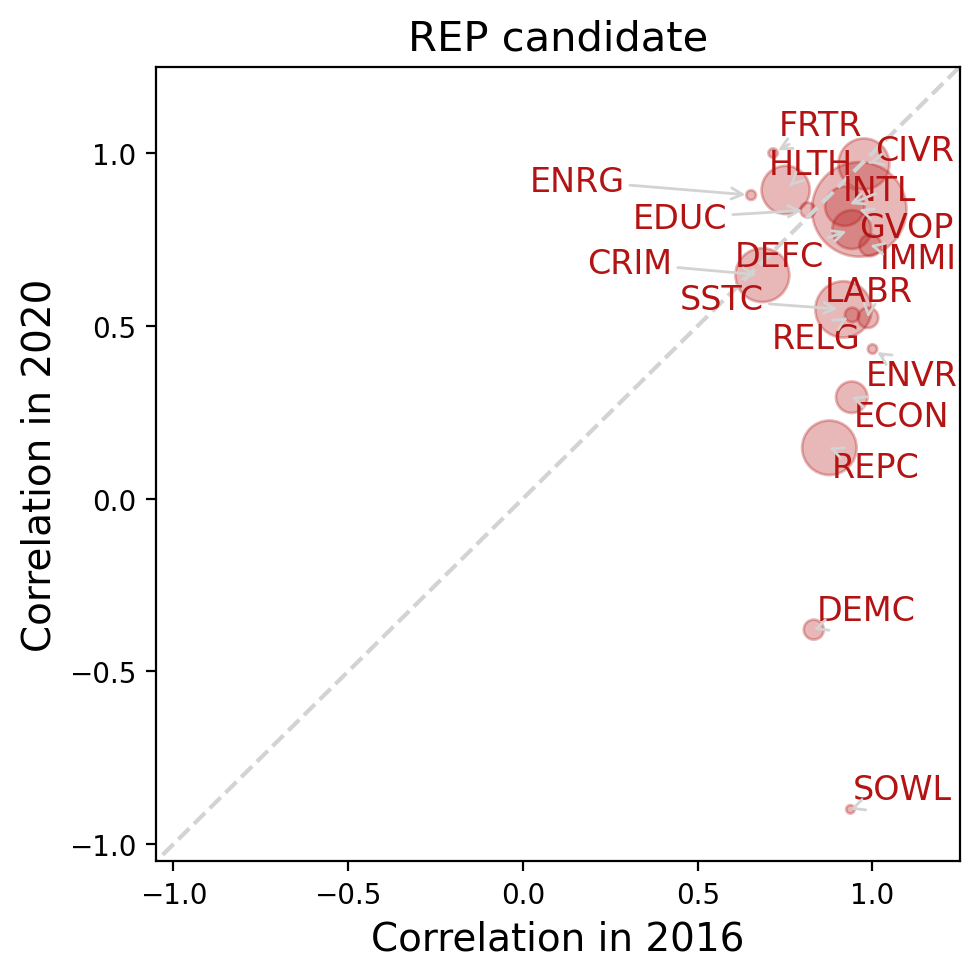

In [18]:
from adjustText import adjust_text

fig,ax = plt.subplots(figsize=(5,5), sharey=True)
topics = [ABBR_MAP[t] for t in cred_corr_bothyear["topic"].tolist()]

x1 = cred_corr_bothyear["corr_trump_cred2016"].tolist()
y1 = cred_corr_bothyear["corr_trump_cred2020"].tolist()
s1 = cred_corr_bothyear["c1_words_trump_cred2016"] + cred_corr_bothyear["c2_words_trump_cred2016"]
s1 += cred_corr_bothyear["c1_words_trump_cred2020"] + cred_corr_bothyear["c2_words_trump_cred2020"]

ax.scatter(x1, y1, color=COLORMAP["right"], s=s1/500, alpha=.3)

ax.set_title("REP candidate", fontsize=15)

ax.plot([-4,4],[-4,4], linestyle="--", color="lightgrey")
ax.set_xlim(-1.05,1.25)
ax.set_ylim(-1.05,1.25)
ax.set_xlabel("Correlation in 2016", fontsize=14)
ax.set_ylabel("Correlation in 2020", fontsize=14)

texts = [ax.text(x1[n], y1[n], topics[n], color=COLORMAP["right"], fontsize=12) for n in range(len(x1))]
adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle="->", color="lightgrey"))

plt.tight_layout()
# plt.savefig(OUTPUT_FPATH + "cred_word_corr_across_year_REP.pdf", dpi=300, bbox_inches="tight")

posx and posy should be finite values


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


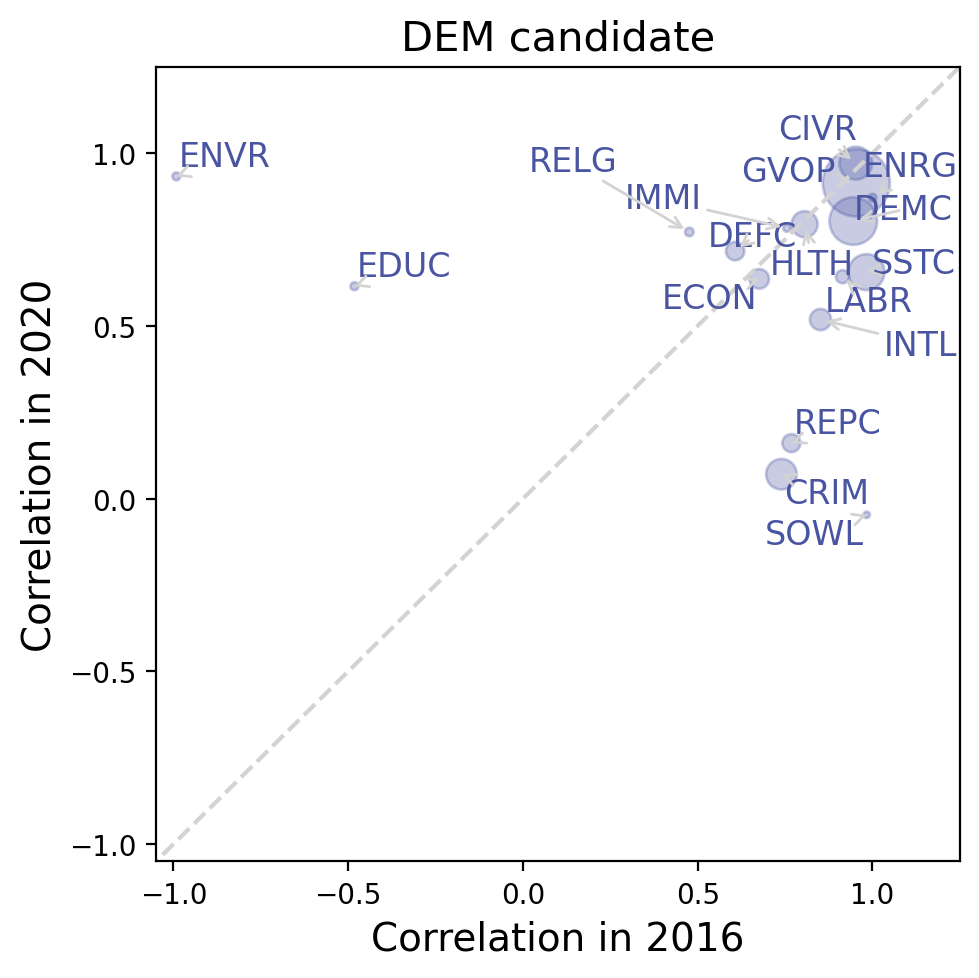

In [19]:
from adjustText import adjust_text

fig,ax = plt.subplots(figsize=(5,5), sharey=True)
topics = [ABBR_MAP[t] for t in cred_corr_bothyear["topic"].tolist()]

x2 = cred_corr_bothyear["corr_clinton_cred2016"].tolist()
y2 = cred_corr_bothyear["corr_biden_cred2020"].tolist()
s2 = cred_corr_bothyear["c1_words_clinton_cred2016"] + cred_corr_bothyear["c2_words_clinton_cred2016"]
s2 += cred_corr_bothyear["c1_words_biden_cred2020"] + cred_corr_bothyear["c2_words_biden_cred2020"]

ax.scatter(x2, y2, color=COLORMAP["left"], s=s2/500, alpha=.3)

ax.set_title("DEM candidate", fontsize=15)

ax.plot([-4,4],[-4,4], linestyle="--", color="lightgrey")
ax.set_xlim(-1.05,1.25)
ax.set_ylim(-1.05,1.25)
ax.set_xlabel("Correlation in 2016", fontsize=14)
ax.set_ylabel("Correlation in 2020", fontsize=14)

texts = [ax.text(x2[n], y2[n], topics[n], color=COLORMAP["left"], fontsize=12) for n in range(len(x2))]
adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle="->", color="lightgrey"))

plt.tight_layout()
# plt.savefig(OUTPUT_FPATH + "cred_word_corr_across_year_DEM.pdf", dpi=300, bbox_inches="tight")

In [20]:
cred_corr_bothyear[["topic", "corr_biden_cred2020"]]

,topic,corr_biden_cred2020
0,energy,0.870899
1,environment,0.932497
2,social_welfare,-0.046945
3,foreign_trade,NaN
4,education,0.614563
5,religion,0.771714
6,labour,0.642145
7,immigration,0.783016
8,healthcare,0.794053
9,economy,0.635886


In [21]:
ideo_corr_bothyear[["topic", "corr_biden_ideo2020"]]

,topic,corr_biden_ideo2020
0,energy,0.147458
1,foreign_trade,NaN
2,social_welfare,0.173498
3,environment,0.947814
4,education,0.739688
5,religion,0.800378
6,labour,0.745508
7,healthcare,0.841502
8,immigration,0.923806
9,DEM_cand_controversies,0.756881


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


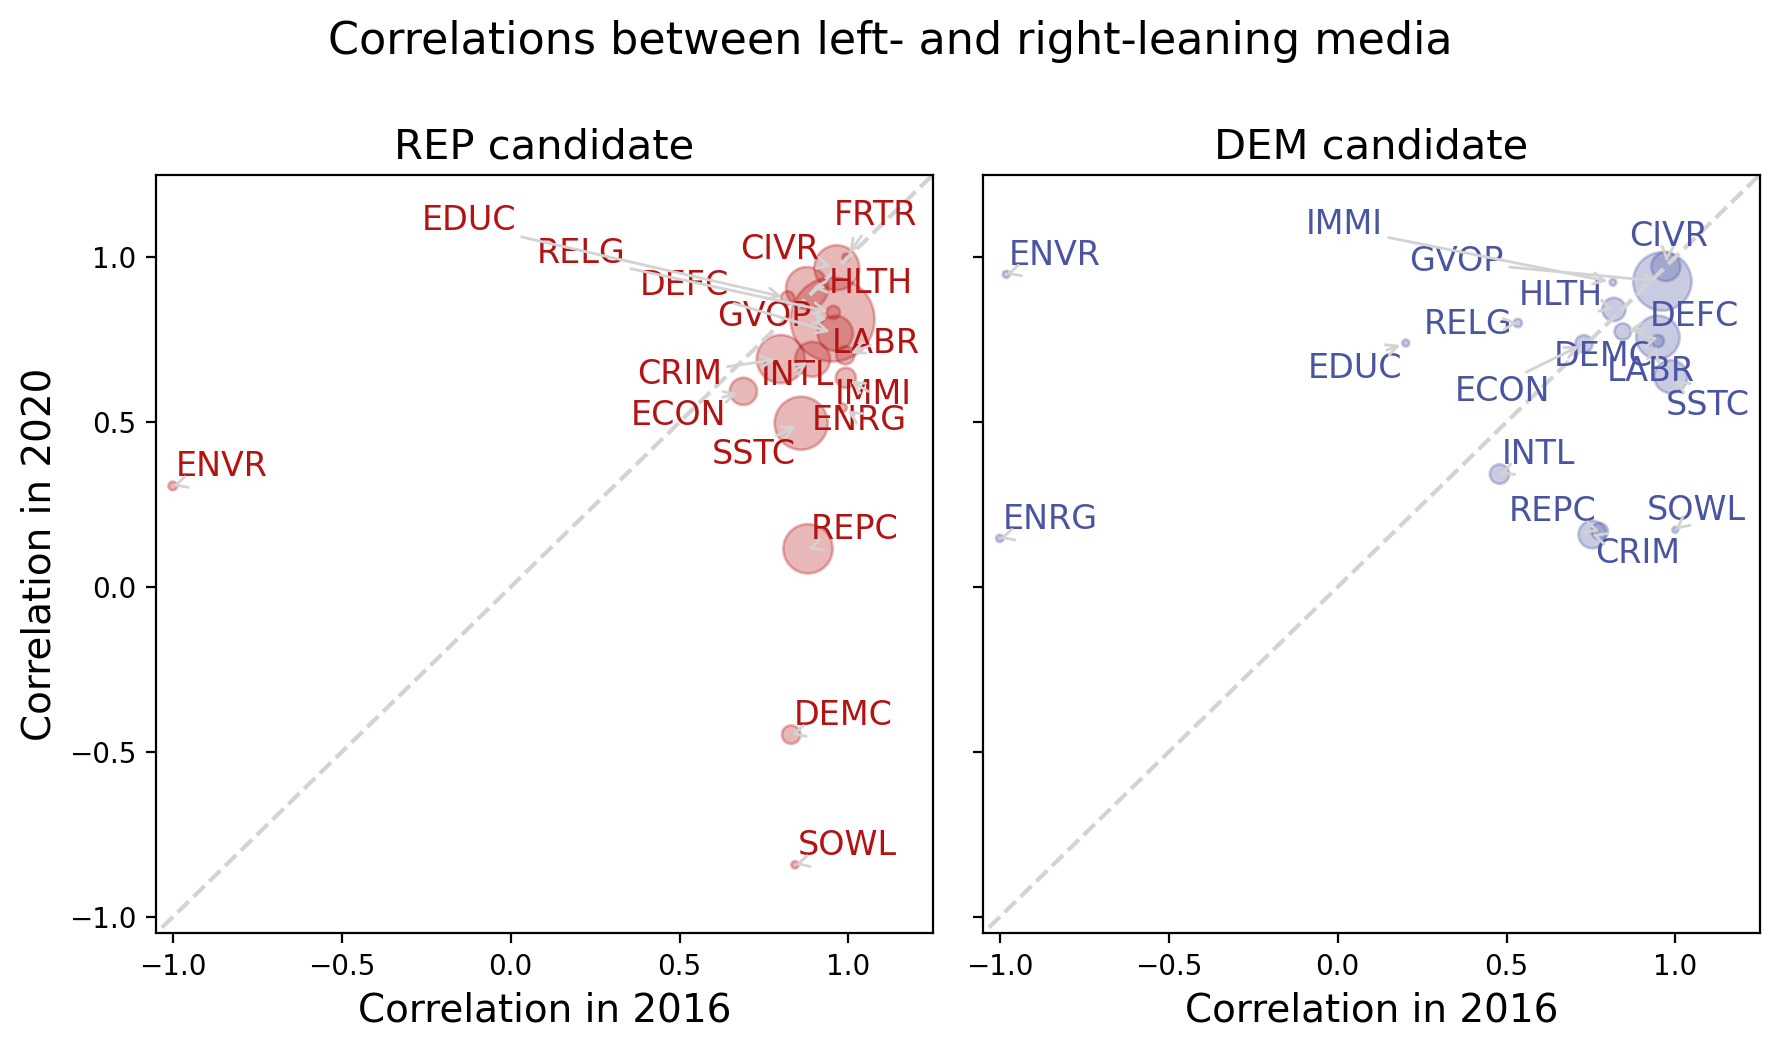

In [22]:
from adjustText import adjust_text
fig,ax = plt.subplots(ncols=2, figsize=(9,5.2), sharex=True, sharey=True)
topics = [ABBR_MAP[t] for t in ideo_corr_bothyear["topic"].tolist()]

x1 = ideo_corr_bothyear["corr_trump_ideo2016"].tolist()
y1 = ideo_corr_bothyear["corr_trump_ideo2020"].tolist()
s1 = ideo_corr_bothyear["c1_words_trump_ideo2016"] + ideo_corr_bothyear["c2_words_trump_ideo2016"]
s1 += ideo_corr_bothyear["c1_words_trump_ideo2020"] + ideo_corr_bothyear["c2_words_trump_ideo2020"]

x2 = ideo_corr_bothyear["corr_clinton_ideo2016"].tolist()
y2 = ideo_corr_bothyear["corr_biden_ideo2020"].tolist()
s2 = ideo_corr_bothyear["c1_words_clinton_ideo2016"] + ideo_corr_bothyear["c2_words_clinton_ideo2016"]
s2 += ideo_corr_bothyear["c1_words_biden_ideo2020"] + ideo_corr_bothyear["c2_words_biden_ideo2020"]
# ax[0].scatter(x1, y1, color=COLORMAP["right"], alpha=.3, marker=".")
# ax[1].scatter(x2, y2, color=COLORMAP["left"], alpha=.3, marker=".")

ax[0].scatter(x1, y1, color=COLORMAP["right"], s=s1/500, alpha=.3)
ax[1].scatter(x2, y2, color=COLORMAP["left"], s=s2/500, alpha=.3)

ax[0].set_title("REP candidate", fontsize=15)
ax[1].set_title("DEM candidate", fontsize=15)

for i in range(2):
    ax[i].plot([-4,4],[-4,4], linestyle="--", color="lightgrey")
    ax[i].set_xlim(-1.05,1.25)
    ax[i].set_ylim(-1.05,1.25)
    ax[i].set_xlabel("Correlation in 2016", fontsize=14)
    if i == 0:
        ax[i].set_ylabel("Correlation in 2020", fontsize=14)
texts1 = [ax[0].text(x1[n], y1[n], topics[n], color=COLORMAP["right"], fontsize=12) for n in range(len(x1))]
texts2 = [ax[1].text(x2[n], y2[n], topics[n], color=COLORMAP["left"], fontsize=12)  for n in range(len(x2))]

adjust_text(texts1, ax=ax[0], arrowprops=dict(arrowstyle="->", color="lightgrey"))
adjust_text(texts2, ax=ax[1], arrowprops=dict(arrowstyle="->", color="lightgrey"))
plt.suptitle("Correlations between left- and right-leaning media", fontsize=16, y=1)
plt.tight_layout()
plt.savefig(OUTPUT_FPATH + "ideo_word_corr_across_year.pdf", dpi=300, bbox_inches="tight")